Anggota:
- Guido Tamara -1301193303
- Firyal Yamiza Akbar - 1301194154

# **Informasi Data**

#### Sumber Data

Data set yang digunakan yaitu Dataset sentimen Twitter opini film,
https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia

#### Deskripsi Data


Berikut deskripsi dataset tentang Sentimen Twitter Opini Film dengan jumlah text Tweet sebanyak 200  dan jumlah label (Sentiment) 2 label.
- negative
- positive

# **Import Library**

In [833]:

# utilities
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import preprocessor as p

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

# nltk
import nltk
from nltk import ngrams, bigrams, trigrams
from collections import Counter
from nltk.probability import ConditionalFreqDist

#sklearn
from sklearn.model_selection import train_test_split

# Tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding

from IPython.core.display import HTML,display


import warnings 
warnings.filterwarnings('ignore')

# **Load Data**

In [834]:
df = pd.read_csv("dataset_tweet_sentiment_opini_film.csv", encoding="utf-8",header=0)
df

,Id,Sentiment,tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."
...,...,...,...
195,196,positive,Fargo juga adaptasi dari film yang cukup berha...
196,197,positive,637.000 waw ini sangat keren flm horor dng jum...
197,198,positive,@filmziarah film yang tenang dan menghanyutkan...
198,199,positive,Film yg amat menarik. Kisah cinta & kesetiaan ...


In [835]:
#Melakukan drop kolom pada dataset dan replace isi kolom Sentiment
df.drop(['Id'], axis = 1, inplace = True)
df.Sentiment.replace(('positive', 'negative'), (1, 0), inplace=True)
df

,Sentiment,tweet
0,0,Jelek filmnya... apalagi si ernest gak mutu bg...
1,0,Film king Arthur ini film paling jelek dari se...
2,0,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,0,Ane ga suka fast and furious..menurutku kok je...
4,0,"@baekhyun36 kan gua ga tau film nya, lu bilang..."
...,...,...
195,1,Fargo juga adaptasi dari film yang cukup berha...
196,1,637.000 waw ini sangat keren flm horor dng jum...
197,1,@filmziarah film yang tenang dan menghanyutkan...
198,1,Film yg amat menarik. Kisah cinta & kesetiaan ...


In [836]:
# function untuk bar plot
colors = ["red","green","blue","white","yellow","magenta","cyan"]
def draw_bar_plot(category,length,xlabel,ylabel,title,sub):
    plt.subplot(2,2,sub)
    plt.bar(category, length,color = colors)
    plt.legend()
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title, fontsize=15)
    #plt.show()

In [837]:
# function untuk histogram
def draw_hist(xlabel, ylabel,title,target,sub,color):
    plt.subplot(1,2,sub)
    plt.hist(df[df.Sentiment==target]["length"],color = color)
    plt.title(title,fontsize=25)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.ylim(0,1200)
    plt.grid()

In [838]:
# mengecek distribusi kolom Sentiment
print("Tweets Opini Film (Sentiment = Positive):",len(df[df["Sentiment"]==1]))
print("Tweet  Opini Film (Sentiment = Negative):",len(df[df["Sentiment"]==0]))

Tweets Opini Film (Sentiment = Positive): 100
Tweet  Opini Film (Sentiment = Negative): 100


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


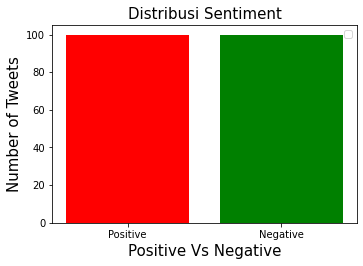

In [839]:
# visualisasi distribusi kolom Sentiment
plt.figure(figsize = (12,8))
draw_bar_plot(["Positive","Negative"],[len(df[df.Sentiment==1]), 
            len(df[df.Sentiment==0])],"Positive Vs Negative","Number of Tweets","Distribusi Sentiment",1)

In [840]:
# memeriksa panjang tweet "Poistive" vs panjang tweet "Negative"
# Mambahkan kolom baru ke kumpulan data yang disebut "length"
def length(text):    
    return len(text)

df["length"]= df.tweet.apply(length)
df

,Sentiment,tweet,length
0,0,Jelek filmnya... apalagi si ernest gak mutu bg...,72
1,0,Film king Arthur ini film paling jelek dari se...,71
2,0,@beexkuanlin Sepanjang film gwa berkata kasar ...,65
3,0,Ane ga suka fast and furious..menurutku kok je...,60
4,0,"@baekhyun36 kan gua ga tau film nya, lu bilang...",109
...,...,...,...
195,1,Fargo juga adaptasi dari film yang cukup berha...,97
196,1,637.000 waw ini sangat keren flm horor dng jum...,105
197,1,@filmziarah film yang tenang dan menghanyutkan...,140
198,1,Film yg amat menarik. Kisah cinta & kesetiaan ...,138


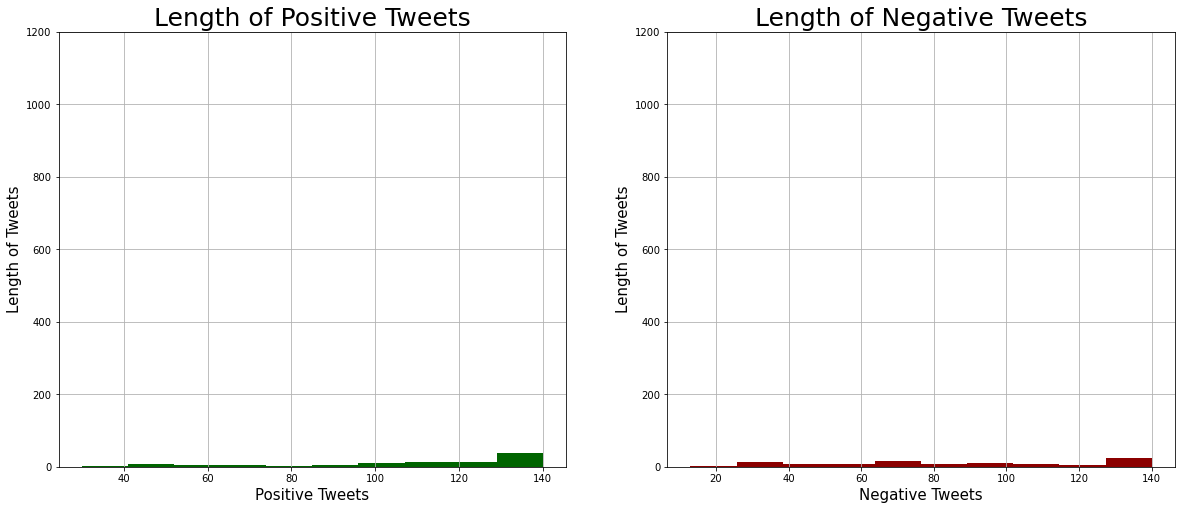

In [841]:
# visualisasi distribusi panjang tweet positive vs negative
plt.figure(figsize = (20,8))
draw_hist("Positive Tweets","Length of Tweets","Length of Positive Tweets",1, 1,"darkgreen")
draw_hist("Negative Tweets","Length of Tweets","Length of Negative Tweets",0, 2,"darkred")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Sentiment
1    109.20
0     86.52
Name: length, dtype: float64


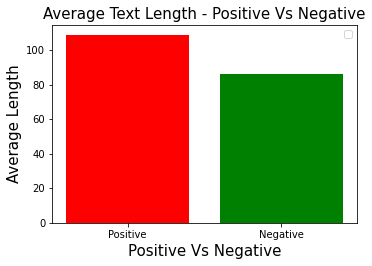

In [842]:
# Periksa rata-rata panjang tweet Positif Vs Negatif
print(df.groupby("Sentiment").mean()["length"].sort_values(ascending = False))

# visualisasikan distribusi
plt.figure(figsize = (12,8))
draw_bar_plot(["Positive","Negative"],[df[df.Sentiment==1].mean()["length"], 
            df[df.Sentiment==0].mean()["length"]],
            "Positive Vs Negative","Average Length","Average Text Length - Positive Vs Negative",1)

# **Data Preprocessing**

Missing Values

In [843]:
# checking for NaN values.
print(df.isnull().sum())

display(HTML(f"<p>Inferensi : dataset tidak memiliki nilan NaN.</p>"))

Sentiment    0
tweet        0
length       0
dtype: int64


Data Duplikat

In [844]:
# Mengecek data duplikasi data
no_of_duplicates=df.duplicated().sum()

display(HTML(f"<p>Inferensi : Ada {no_of_duplicates} jumlah nilai duplikat yang perlu dibuang.</p>"))

In [845]:
#Removal of any Duplicate rows (if any)
counter = 0
r,c = df.shape

df1 = df.drop_duplicates()
df1.reset_index(drop=True, inplace=True)

if df1.shape==(r,c):
    display(HTML(f"<p>Inferensi : Dataset tidak memiliki duplikat.</p>"))
else:
    display(HTML(f"<p>Inferensi : Jumlah duplikat yang drop/diperbaiki yaitu {r-df1.shape[0]}.</p>"))

**Case Folding**\
Convert seluruh kata memjadi lowercase

In [846]:
df["tweet"] = df["tweet"].str.lower()
df.head()

,Sentiment,tweet,length
0,0,jelek filmnya... apalagi si ernest gak mutu bg...,72
1,0,film king arthur ini film paling jelek dari se...,71
2,0,@beexkuanlin sepanjang film gwa berkata kasar ...,65
3,0,ane ga suka fast and furious..menurutku kok je...,60
4,0,"@baekhyun36 kan gua ga tau film nya, lu bilang...",109


**Noise Removal**\
Hapus karakter khusus seperti hastag, angka, tanda baca, Url, dll

In [847]:
def normalization(tweet):
    text = str(tweet)
    p.set_options(p.OPT.EMOJI, p.OPT.HASHTAG, 
                            p.OPT.MENTION, p.OPT.NUMBER, p.OPT.SMILEY, p.OPT.URL)
    text = p.clean(tweet)
    return text

In [848]:
df["tweet"] = df["tweet"].apply(normalization)
df.head()

,Sentiment,tweet,length
0,0,jelek filmnya... apalagi si ernest gak mutu bg...,72
1,0,film king arthur ini film paling jelek dari se...,71
2,0,sepanjang film gwa berkata kasar terus pada ba...,65
3,0,ane ga suka fast and furious..menurutku kok je...,60
4,0,"kan gua ga tau film nya, lu bilang perang pera...",109


In [849]:
#Noise Removal (regex)

#Remove special char
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)


In [850]:
df["tweet"] = df["tweet"].apply(remove_tweet_special)
df["tweet"] = df["tweet"].apply(remove_number)
df["tweet"] = df["tweet"].apply(remove_punctuation)
df["tweet"] = df["tweet"].apply(remove_whitespace_LT)
df["tweet"] = df["tweet"].apply(remove_whitespace_multiple)
df["tweet"] = df["tweet"].apply(remove_singl_char)
df

,Sentiment,tweet,length
0,0,jelek filmnya apalagi si ernest gak mutu bgt a...,72
1,0,film king arthur ini film paling jelek dari se...,71
2,0,sepanjang film gwa berkata kasar terus pada ba...,65
3,0,ane ga suka fast and furiousmenurutku kok jele...,60
4,0,kan gua ga tau film nya lu bilang perang peran...,109
...,...,...,...
195,1,fargo juga adaptasi dari film yang cukup berha...,97
196,1,waw ini sangat keren flm horor dng jumlah peno...,105
197,1,film yang tenang dan menghanyutkan salut denga...,140
198,1,film yg amat menarik kisah cinta kesetiaan yg ...,138


**Tokenization**\
Proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa.

In [851]:
df_text = [] #list menampung semua kalimat awal
for par in df["tweet"]:
    sent_text = nltk.sent_tokenize(par) #tokenisasi
    
   #loop per-kalimat
    for sentence in sent_text:
        df_text_p = [] #list menampung kalimat paragraf
        sent_tokens = nltk.word_tokenize(sentence)
        for token in sent_tokens:
            df_text_p.append(token)
        df_text.append(df_text_p)

In [852]:
df['token'] = df_text
df.head()

,Sentiment,tweet,length,token
0,0,jelek filmnya apalagi si ernest gak mutu bgt a...,72,"[jelek, filmnya, apalagi, si, ernest, gak, mut..."
1,0,film king arthur ini film paling jelek dari se...,71,"[film, king, arthur, ini, film, paling, jelek,..."
2,0,sepanjang film gwa berkata kasar terus pada ba...,65,"[sepanjang, film, gwa, berkata, kasar, terus, ..."
3,0,ane ga suka fast and furiousmenurutku kok jele...,60,"[ane, ga, suka, fast, and, furiousmenurutku, k..."
4,0,kan gua ga tau film nya lu bilang perang peran...,109,"[kan, gua, ga, tau, film, nya, lu, bilang, per..."


**Vocabulary**\
Kosakata, kumpulan dari beberapa kata 

In [853]:
# function untuk membuat vocab
from collections import Counter
def create_vocab(df):
    vocab = Counter()
    for i in range(df.shape[0]):
        vocab.update(df.tweet[i].split())
    return(vocab)

In [854]:
master=df.reset_index(drop=True)
vocab = create_vocab(master)

# cek no. kata-kata dalam kosa kata
len(vocab)

1072

In [855]:
vocab.most_common(50)

[('film', 215),
 ('nonton', 71),
 ('ini', 66),
 ('yg', 47),
 ('yang', 46),
 ('dan', 37),
 ('di', 37),
 ('bagus', 27),
 ('kartini', 25),
 ('kecewa', 24),
 ('banget', 23),
 ('the', 21),
 ('keren', 21),
 ('jelek', 20),
 ('sama', 20),
 ('ada', 20),
 ('itu', 18),
 ('bikin', 17),
 ('dari', 16),
 ('ga', 16),
 ('jadi', 16),
 ('guys', 16),
 ('juga', 16),
 ('nya', 15),
 ('saya', 15),
 ('indonesia', 15),
 ('filmnya', 14),
 ('kurang', 14),
 ('ya', 13),
 ('parah', 13),
 ('banyak', 13),
 ('gak', 12),
 ('dengan', 12),
 ('danur', 11),
 ('ditonton', 11),
 ('gue', 11),
 ('agak', 11),
 ('aku', 11),
 ('sih', 11),
 ('aja', 11),
 ('sangat', 11),
 ('bgt', 10),
 ('tonton', 10),
 ('tapi', 10),
 ('bisa', 10),
 ('tp', 10),
 ('ternyata', 9),
 ('abis', 9),
 ('buat', 9),
 ('untuk', 9)]

# **Feature Engineering**

**Pemodelan N-GRAM**

In [856]:
# buat kumpulan data terpisah dari tweet positive dan negative
positive = df[df.Sentiment==1].reset_index()
negative = df[df.Sentiment==0].reset_index()

In [857]:
# functionuntuk membuat 10 n-gram teratas
def get_ngrams(data,n):
    all_words = []
    for i in range(len(data)):
        temp = data["tweet"][i].split()
        for word in temp:
            all_words.append(word)

    tokenized = all_words
    esBigrams = ngrams(tokenized, n)

    esBigram_wordlist = nltk.FreqDist(esBigrams)
    top10 = esBigram_wordlist.most_common(10)
    top10 = dict(top10)
    df_ngrams = pd.DataFrame(sorted(top10.items(), key=lambda x: x[1])[::-1])
    return df_ngrams

In [858]:
# function  untuk memvisualisasikan 10 n-gram teratas
def draw_barplots(positive,negative,title):
    plt.figure(figsize = (18,14))

    plt.subplot(1,2,1)
    sns.barplot(y=positive[0].values[:10], x=positive[1].values[:10], color='green')
    plt.title("Top 10" + title + "Positive Tweets",fontsize=15)
    
    plt.subplot(1,2,2)
    sns.barplot(y=negative[0].values[:10], x=negative[1].values[:10],color='red')
    plt.title("Top 10" + title + "Negative Tweets",fontsize=15)

**Unigram**

In [859]:
# membuat top 10 unigrams
positive_unigrams = get_ngrams(positive,1)
negative_unigrams = get_ngrams(negative,1)

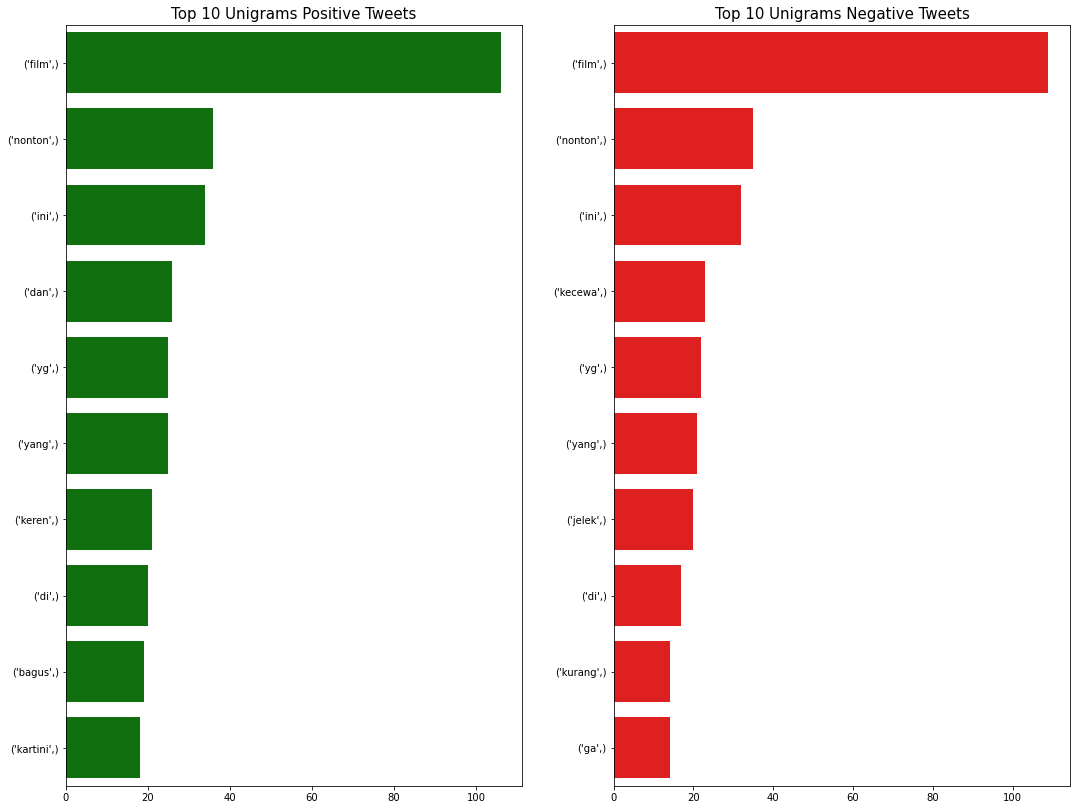

In [860]:
# visualisasi top 10 unigrams
draw_barplots(positive_unigrams,negative_unigrams," Unigrams ")

**Bigram**

In [861]:
# lets create top 10 bigrams
positive_bigrams = get_ngrams(positive,2)
negative_bigrams = get_ngrams(negative,2)

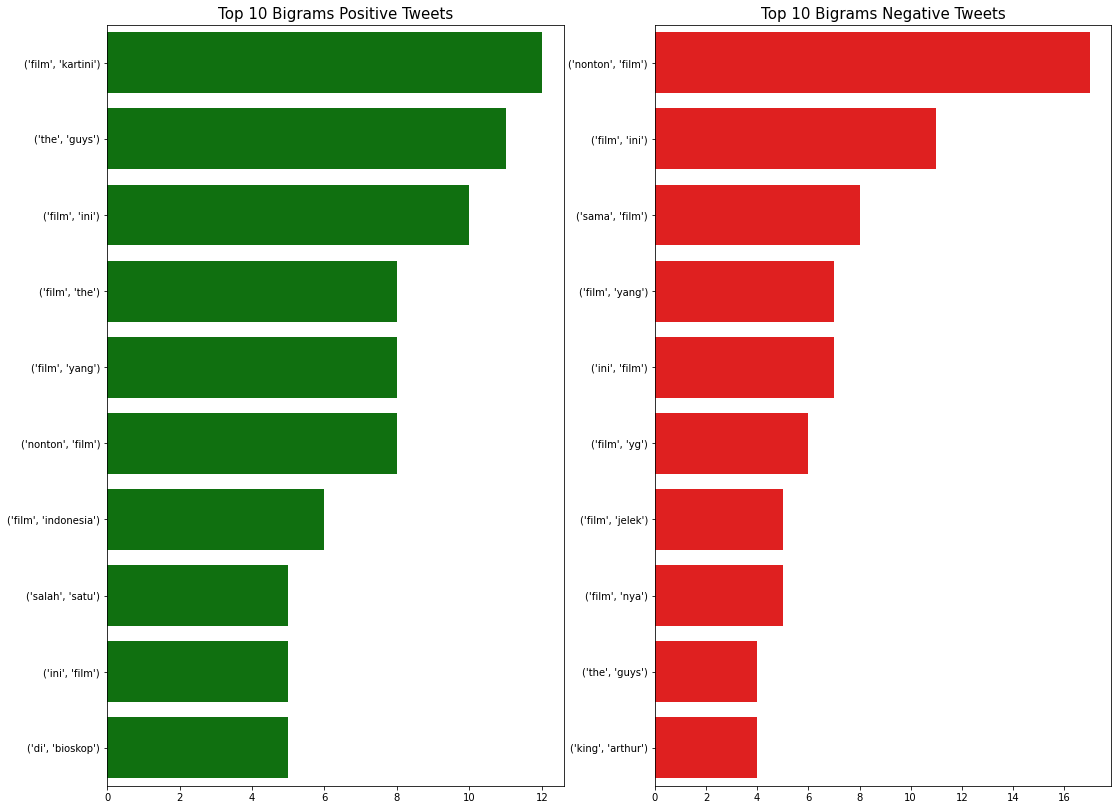

In [862]:
# lets visualize top 10 bigrams
draw_barplots(positive_bigrams,negative_bigrams," Bigrams ")

**Trigram**

In [863]:
# lets create top 10 trigram
positive_trigram = get_ngrams(positive,3)
negative_trigram = get_ngrams(negative,3)

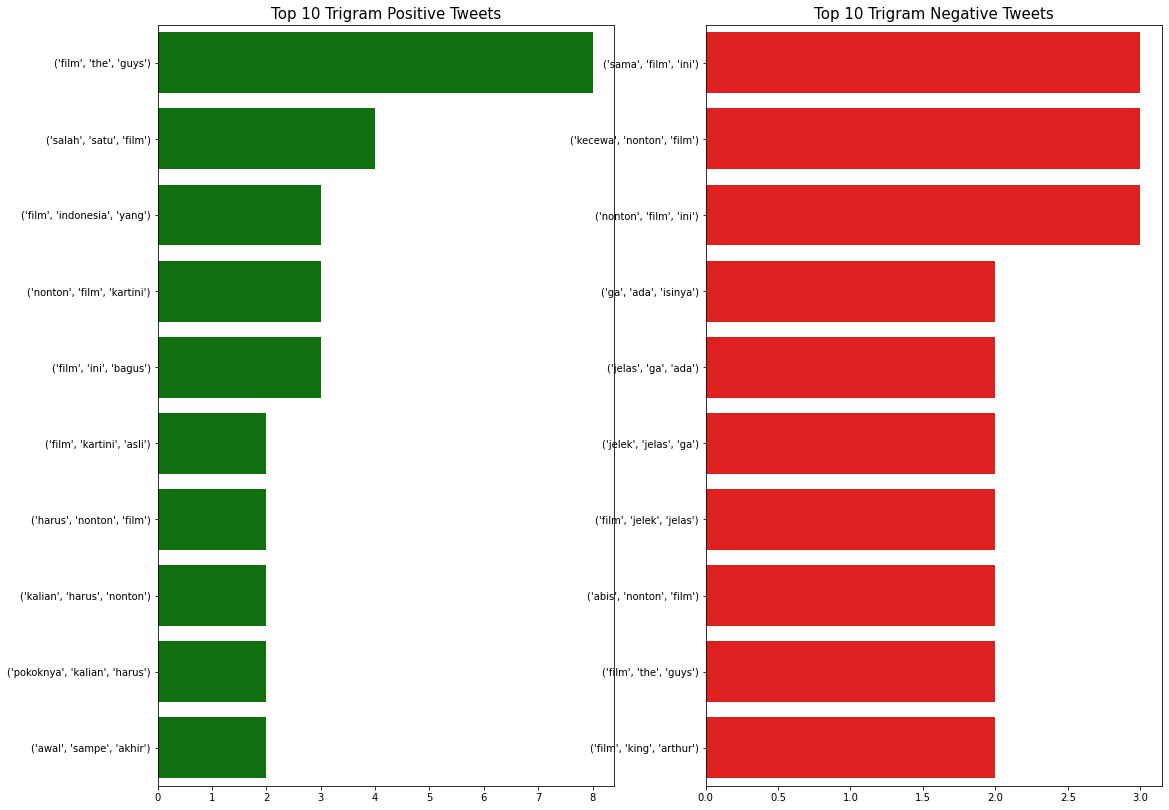

In [864]:
# lets visualize top 10 bigrams
draw_barplots(positive_trigram,negative_trigram," Trigram ")

# **Pemodelan Neural Based**

In [865]:
#mengubah dataset menjadi 1 string utuh
df_nn = ', '.join(df["tweet"]).replace(u'\xa0', u' ')
df_nn

'jelek filmnya apalagi si ernest gak mutu bgt actingnya film sampah, film king arthur ini film paling jelek dari seluruh cerita king arthur, sepanjang film gwa berkata kasar terus pada bapaknya, ane ga suka fast and furiousmenurutku kok jelek ya tu film, kan gua ga tau film nya lu bilang perang perangan perangan disebut ama rp yaoi jadi ambigu , tolong editingnya yg bagus ya saya sering kecewa dgn film indonesia ditunggu filmnya, kecewa dgn salah satu aktornya yg ternyata pendukung penista agama ah saya harus bersabar utk tak menonton film ini, kecewa parah sama film the guys dear sorry to say this, banyak yg kecewa abis nonton film ini, adalah film yang paling memgecewakan saya selama hidup yah padahal sy udh berekspektasi tinggi dan suka bgt mesir kuno, film jelek jelas ga ada isinya, awal bulan ini nonton dua film indonesia di bioskop kartini dan critical eleven penggambaran kartini dan ale juga anya terlalu lemah, nonton film miris ternyata di jaman itu dan jaman sekarang bangsa ki

In [866]:
# buat pemetaan karakter unik ke bilangan bulat dan character mapping index
chars = sorted(list(set(df_nn)))
mapping = dict((c,i) for i,c in enumerate(chars))

In [867]:
#melihat berapa banya kata Characters dan vocab
n_chars = len(df_nn)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  17460
Total Vocab:  27


In [868]:
# siapkan dataset dari pasangan input ke output yang dikodekan sebagai bilangan bulat
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = df_nn[i:i + seq_length]
	seq_out = df_nn[i + seq_length]
	dataX.append([mapping[char] for char in seq_in])
	dataY.append(mapping[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  17360


In [869]:
#fungsi tahapan sequence kata
def create_seq(text):
    length = 20
    sequences = list()
    for i in range(length, len(text)):
        #pilih sequences token
        seq = text[i-length:i+1]
        #store
        sequences.append(seq)
    print('total sequences: %d' % len(sequences))
    return sequences

#membuat sequences
sequences = create_seq(df_nn)
sequences

total sequences: 17440


['jelek filmnya apalagi',
 'elek filmnya apalagi ',
 'lek filmnya apalagi s',
 'ek filmnya apalagi si',
 'k filmnya apalagi si ',
 ' filmnya apalagi si e',
 'filmnya apalagi si er',
 'ilmnya apalagi si ern',
 'lmnya apalagi si erne',
 'mnya apalagi si ernes',
 'nya apalagi si ernest',
 'ya apalagi si ernest ',
 'a apalagi si ernest g',
 ' apalagi si ernest ga',
 'apalagi si ernest gak',
 'palagi si ernest gak ',
 'alagi si ernest gak m',
 'lagi si ernest gak mu',
 'agi si ernest gak mut',
 'gi si ernest gak mutu',
 'i si ernest gak mutu ',
 ' si ernest gak mutu b',
 'si ernest gak mutu bg',
 'i ernest gak mutu bgt',
 ' ernest gak mutu bgt ',
 'ernest gak mutu bgt a',
 'rnest gak mutu bgt ac',
 'nest gak mutu bgt act',
 'est gak mutu bgt acti',
 'st gak mutu bgt actin',
 't gak mutu bgt acting',
 ' gak mutu bgt actingn',
 'gak mutu bgt actingny',
 'ak mutu bgt actingnya',
 'k mutu bgt actingnya ',
 ' mutu bgt actingnya f',
 'mutu bgt actingnya fi',
 'utu bgt actingnya fil',
 'tu bgt act

In [870]:
#fungsi encoding setiap karakter
def encode_seq(seq):
   sequences = list()
   for line in seq:
       #Integer encode Line
       encoded_seq=[mapping[char] for char in line]
       #store
       sequences.append(encoded_seq)
   return sequences

#encode the sequences
sequences = encode_seq(sequences)
sequences

[[11, 6, 13, 6, 12, 0, 7, 10, 13, 14, 15, 25, 2, 0, 2, 17, 2, 13, 2, 8, 10],
 [6, 13, 6, 12, 0, 7, 10, 13, 14, 15, 25, 2, 0, 2, 17, 2, 13, 2, 8, 10, 0],
 [13, 6, 12, 0, 7, 10, 13, 14, 15, 25, 2, 0, 2, 17, 2, 13, 2, 8, 10, 0, 19],
 [6, 12, 0, 7, 10, 13, 14, 15, 25, 2, 0, 2, 17, 2, 13, 2, 8, 10, 0, 19, 10],
 [12, 0, 7, 10, 13, 14, 15, 25, 2, 0, 2, 17, 2, 13, 2, 8, 10, 0, 19, 10, 0],
 [0, 7, 10, 13, 14, 15, 25, 2, 0, 2, 17, 2, 13, 2, 8, 10, 0, 19, 10, 0, 6],
 [7, 10, 13, 14, 15, 25, 2, 0, 2, 17, 2, 13, 2, 8, 10, 0, 19, 10, 0, 6, 18],
 [10, 13, 14, 15, 25, 2, 0, 2, 17, 2, 13, 2, 8, 10, 0, 19, 10, 0, 6, 18, 15],
 [13, 14, 15, 25, 2, 0, 2, 17, 2, 13, 2, 8, 10, 0, 19, 10, 0, 6, 18, 15, 6],
 [14, 15, 25, 2, 0, 2, 17, 2, 13, 2, 8, 10, 0, 19, 10, 0, 6, 18, 15, 6, 19],
 [15, 25, 2, 0, 2, 17, 2, 13, 2, 8, 10, 0, 19, 10, 0, 6, 18, 15, 6, 19, 20],
 [25, 2, 0, 2, 17, 2, 13, 2, 8, 10, 0, 19, 10, 0, 6, 18, 15, 6, 19, 20, 0],
 [2, 0, 2, 17, 2, 13, 2, 8, 10, 0, 19, 10, 0, 6, 18, 15, 6, 19, 20, 0, 8],
 [0

In [871]:
#ukuran vocabulary 
vocab = len(mapping)
sequences = np.array(sequences)
#create x and y
x,y = sequences[:,:-1],sequences[:,-1]
#one hot encode y
y = to_categorical(y, num_classes = vocab)
#create train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1,random_state = 42)
print('Train shape : ', x_train.shape,'val shape:', x_val.shape)

Train shape :  (15696, 20) val shape: (1744, 20)


In [872]:
# membuat model
model = Sequential()
model.add(Embedding(vocab, 50, input_length = 20, trainable=True))
model.add(GRU(150, recurrent_dropout= 0.1,dropout= 0.1))
model.add(Dense(vocab, activation='softmax'))
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 20, 50)            1350      
                                                                 
 gru_15 (GRU)                (None, 150)               90900     
                                                                 
 dense_15 (Dense)            (None, 27)                4077      
                                                                 
Total params: 96,327
Trainable params: 96,327
Non-trainable params: 0
_________________________________________________________________
None


In [873]:
#compile the model
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'] , optimizer = "adam")
#fit the model
model.fit(x_train, y_train, epochs= 40, verbose = 2,validation_data = (x_val, y_val))

Epoch 1/40
491/491 - 19s - loss: 2.4401 - accuracy: 0.2859 - val_loss: 2.1427 - val_accuracy: 0.3549 - 19s/epoch - 39ms/step
Epoch 2/40
491/491 - 13s - loss: 2.0837 - accuracy: 0.3730 - val_loss: 2.0265 - val_accuracy: 0.3819 - 13s/epoch - 27ms/step
Epoch 3/40
491/491 - 14s - loss: 1.9785 - accuracy: 0.3993 - val_loss: 1.9584 - val_accuracy: 0.4065 - 14s/epoch - 28ms/step
Epoch 4/40
491/491 - 14s - loss: 1.8955 - accuracy: 0.4241 - val_loss: 1.9074 - val_accuracy: 0.4169 - 14s/epoch - 28ms/step
Epoch 5/40
491/491 - 14s - loss: 1.8193 - accuracy: 0.4515 - val_loss: 1.8447 - val_accuracy: 0.4490 - 14s/epoch - 28ms/step
Epoch 6/40
491/491 - 13s - loss: 1.7515 - accuracy: 0.4749 - val_loss: 1.8151 - val_accuracy: 0.4547 - 13s/epoch - 27ms/step
Epoch 7/40
491/491 - 13s - loss: 1.6797 - accuracy: 0.4940 - val_loss: 1.7820 - val_accuracy: 0.4748 - 13s/epoch - 27ms/step
Epoch 8/40
491/491 - 13s - loss: 1.6164 - accuracy: 0.5145 - val_loss: 1.7627 - val_accuracy: 0.4862 - 13s/epoch - 27ms/step


# **Eksperimen Pemodelan N-GRAM**

In [874]:
#kalimat uji test
df["tweet"].iloc[28]

'kecewa berat sama film power rangers dibawah ekspektasi banget'

**Test Model Bigram**

In [875]:
#create placeholder for model bigran
cfdist = ConditionalFreqDist()
# Count frequency of co-occurance
for sentence in df_text:
 for w1,w2 in bigrams(sentence,pad_right=True,pad_left=True):
      cfdist[(w1)][w2] += 1
      
#Let's transform the counts to probabilities
for wl_ in cfdist:
 total_count=float(sum(cfdist[wl_].values()))
 for w2 in cfdist[wl_]:
      cfdist[wl_][w2] /= total_count

In [885]:
dict(cfdist["kecewa"])

{'dgn': 0.125,
 'parah': 0.125,
 'abis': 0.041666666666666664,
 'nonton': 0.125,
 'ya': 0.041666666666666664,
 'teman': 0.041666666666666664,
 'ama': 0.041666666666666664,
 'berat': 0.041666666666666664,
 None: 0.08333333333333333,
 'sama': 0.125,
 'waktu': 0.041666666666666664,
 'film': 0.041666666666666664,
 'ma': 0.041666666666666664,
 'banyak': 0.041666666666666664,
 'bgt': 0.041666666666666664}

**Test Model Trigram**

In [877]:
#create placeholder for model trigram
model_trigram = ConditionalFreqDist()
# Count frequency of co-occurance
for sentence in df_text:
 for w1,w2,w3 in trigrams(sentence, pad_right=True, pad_left=True):
      model_trigram[(w1, w2)][w3] += 1
      
#Let's transform the counts to probabilities
for wl_w2 in model_trigram:
 total_count=float(sum(model_trigram[wl_w2].values()))
 for w3 in model_trigram[wl_w2]:
      model_trigram[wl_w2][w3] /= total_count

In [886]:
dict(model_trigram["kecewa","berat"])

{'sama': 1.0}

# **Eksperimen Pemodelan Neural Based**

In [879]:
# menghasilkan urutan karakter dengan language model
def generate_seq(model,mapping,seq_length,seed_text,n_chars):
  in_text = seed_text
  #menghasilkan jumlah karakter tetap
  for _ in range(n_chars):
      #menyandikan karakter sebagai bilangan integers
      encoded = [mapping[char]for char in in_text]
      #truncate sequences to fixed Length
      encoded = pad_sequences([encoded],maxlen = seq_length, truncating = "pre")
      #predict character
      yhat = np.argmax(model.predict(encoded, verbose = 0))
      #membalikkan peta integer ke karakter
      out_char = ''
      for char,index in mapping.items():
          if index == yhat:
              out_char = char
              break
      #append to input
      in_text += char
  return in_text

In [887]:
#kalimat uji test
df["tweet"].iloc[28]

'kecewa berat sama film power rangers dibawah ekspektasi banget'

In [884]:
input = "kecewa berat"
print(len(input))
print(generate_seq(model, mapping, 20, input.lower(), 40))


12
kecewa berat sama film ini bagus banget sama film in


In [888]:
input = "kecewa berat sama"
print(len(input))
print(generate_seq(model, mapping, 20, input.lower(), 40))

17
kecewa berat sama film ini bagus banget sama film ini bag


In [889]:
input = "kecewa berat sama film"
print(len(input))
print(generate_seq(model, mapping, 20, input.lower(), 40))

22
kecewa berat sama film ini bagus banget sama film ini bagus ba


In [893]:
input = "kecewa berat sama film power"
print(len(input))
print(generate_seq(model, mapping, 20, input.lower(), 40))

28
kecewa berat sama film power aku juga dipetik diang banget sama film


# **Kesimpulan**

- Dataset kecil sekitar 200 sampel & preprocessing.
- Ulasan positif & negatif tweets didistribusikan secara merata.
- Untuk pemodelan N-gram dimana Semakin besar jumlah n-gram maka semakin berkinerja dengan baik. Tetapi terdapat kekurangan dimana kelangkaan data.
- Untuk pemodelan Neural-based dimana Semakin baik pemodan yang di latih maka semakin baik pula prediksi yang akan ditemukannya dan lebih baik lagi memiliki data sample yang sangat besar. Kekurangannya lamanya memproses model latih.
